In [1]:
import os 
os.getcwd()

'C:\\Users\\Precious Olalere\\Documents\\IS 567 Text Mining'

In [2]:
import nltk
import re
import gensim
from gensim import corpora
import operator

nltk.download('stopwords')
from nltk.corpus import stopwords

import numpy as np
import random

[nltk_data] Downloading package stopwords to C:\Users\Precious
[nltk_data]     Olalere\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import pandas as pd

In [4]:
pip install --upgrade bottleneck


Note: you may need to restart the kernel to use updated packages.


In [5]:
#Task 1: Data Preprocessing 
#Import the dataset (20_newsgroup.csv) 
news=pd.read_csv("20_newsgroup.csv")
news.head(10)

,text,types
0,I was wondering if anyone out there could enli...,rec.autos
1,I recently posted an article asking what kind ...,rec.autos
2,\nIt depends on your priorities. A lot of peo...,rec.autos
3,an excellent automatic can be found in the sub...,rec.autos
4,: Ford and his automobile. I need information...,rec.autos
5,\nYo! Watch the attributions--I didn't say tha...,rec.autos
6,\nYou can avoid these problems entirely by ins...,rec.autos
7,"I have a 1986 Acura Integra 5 speed with 95,00...",rec.autos
8,"\nassuming yours is a non turbo MR2, the gruff...",rec.autos
9,"\n\nIn addition to restricted mileage, many cl...",rec.autos


In [6]:
#Remove lines with null in “text” column.

#first checking for missing values 

news.isnull().sum()

text     218
types      0
dtype: int64

In [7]:
#dropping nan values in text column 
#news.drop(news[news.text.isnull()].index, axis=0).head(10)
# Drop rows where 'text' column has NaN values
news = news.dropna(subset=['text'])

# Display the first 10 rows after dropping NaN values
news.head(10)


,text,types
0,I was wondering if anyone out there could enli...,rec.autos
1,I recently posted an article asking what kind ...,rec.autos
2,\nIt depends on your priorities. A lot of peo...,rec.autos
3,an excellent automatic can be found in the sub...,rec.autos
4,: Ford and his automobile. I need information...,rec.autos
5,\nYo! Watch the attributions--I didn't say tha...,rec.autos
6,\nYou can avoid these problems entirely by ins...,rec.autos
7,"I have a 1986 Acura Integra 5 speed with 95,00...",rec.autos
8,"\nassuming yours is a non turbo MR2, the gruff...",rec.autos
9,"\n\nIn addition to restricted mileage, many cl...",rec.autos


In [8]:
news.isnull().sum()

text     0
types    0
dtype: int64

In [9]:
#Group the samples in the dataframe by “types” column

talk_news = news.loc[news["types"].isin(["talk.politics.guns", "talk.politics.mideast", "talk.politics.misc", "talk.religion.misc"])]
rec_news = news.loc[news["types"].isin(["rec.autos", "rec.motorcycles", "rec.sport.baseball", "rec.sport.hockey"])]

print("Talk DataFrame:")
print(talk_news)

print("\nRec DataFrame:")
print(rec_news)


Talk DataFrame:
                                                    text               types
2349   \n\n\n\n\nOf course.  The term must be rigidly...  talk.politics.guns
2350   / iftccu:talk.politics.guns / vincent@cad.gate...  talk.politics.guns
2351   \nWow, the scope of the mission of the ATF con...  talk.politics.guns
2352   \nNo answer.\n\n\nI do not feel like the camer...  talk.politics.guns
2353   :|> >wrong about the  whole guns-for-protectio...  talk.politics.guns
...                                                  ...                 ...
10714  \n\nWhere did you hear this?  I seem to have m...  talk.politics.misc
10715  # ## Face it, Clayton, he was not found guilty...  talk.politics.misc
10716  \nAgain, Mr. Frank has come to the rescue with...  talk.politics.misc
10717  \n\tIt seems radio reports were overly optimis...  talk.politics.misc
10718  \n\n\nyeah, just like we have here in the US.\...  talk.politics.misc

[1910 rows x 2 columns]

Rec DataFrame:
                   

Talk has 1910 news documents and Rec has 2327 news documents

In [10]:
#Create a new dataframe named “talk_rec_df” by concatenating the “talk.<>” dataframe
#and the “rec.<>” dataframe for following analysis. 

talk_rec_df = pd.concat([talk_news, rec_news], ignore_index=True)

print("Talk_Rec DataFrame:")
print(talk_rec_df)

Talk_Rec DataFrame:
                                                   text               types
0     \n\n\n\n\nOf course.  The term must be rigidly...  talk.politics.guns
1     / iftccu:talk.politics.guns / vincent@cad.gate...  talk.politics.guns
2     \nWow, the scope of the mission of the ATF con...  talk.politics.guns
3     \nNo answer.\n\n\nI do not feel like the camer...  talk.politics.guns
4     :|> >wrong about the  whole guns-for-protectio...  talk.politics.guns
...                                                 ...                 ...
4232  \n\nNot necessarily.  It could mean that, or i...  rec.sport.baseball
4233  \nHe's been playing horrible defense. Baylor s...  rec.sport.baseball
4234  Can someone send me ticket ordering informatio...  rec.sport.baseball
4235  \nSorry Len, this is exactly how he suffered f...  rec.sport.baseball
4236                              \n\n\n\n\n   Anaheim.  rec.sport.baseball

[4237 rows x 2 columns]


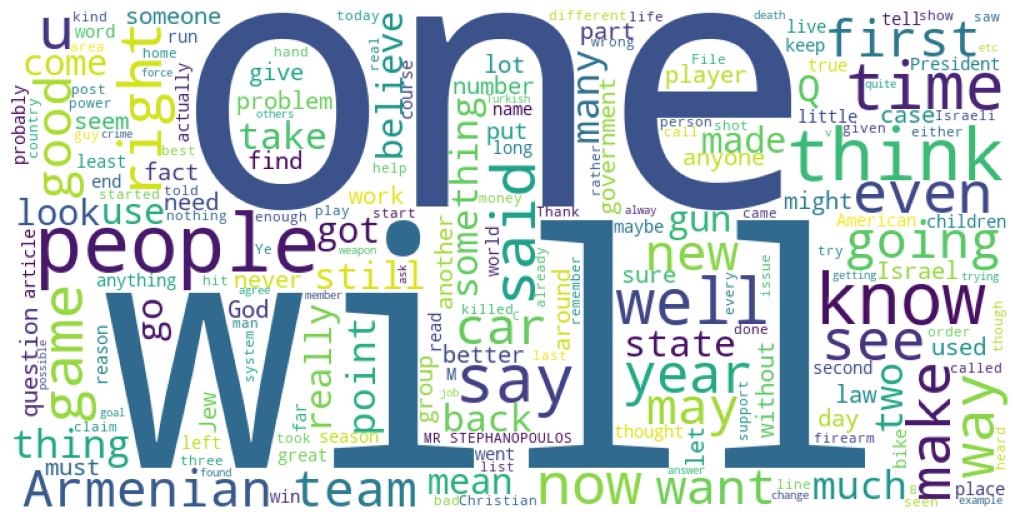

In [11]:
#Task 2: Topic modeling

#Generate a word cloud using “text” column of “talk_rec_df” dataframe to get a visual representation of the most common words.

from wordcloud import WordCloud
import matplotlib.pyplot as plt

news_text = " ".join(talk_rec_df["text"])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(news_text)

# Plot the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')  # Hide axes
plt.tight_layout(pad = 0)
plt.show()



In [12]:
#Transform the textual data from “text” column into a format that will serve as an input for training a LDA model. 
#You need to tokenize the text in “text” column and remove the stopwords using NLTK. 

#nltk.download('punkt')
from nltk.tokenize import word_tokenize
talk_rec_df["Tokenized_text"] = talk_rec_df["text"].apply(word_tokenize)
talk_rec_df[["text","Tokenized_text" ]].head(10)

,text,Tokenized_text
0,\n\n\n\n\nOf course. The term must be rigidly...,"[Of, course, ., The, term, must, be, rigidly, ..."
1,/ iftccu:talk.politics.guns / vincent@cad.gate...,"[/, iftccu, :, talk.politics.guns, /, vincent,..."
2,"\nWow, the scope of the mission of the ATF con...","[Wow, ,, the, scope, of, the, mission, of, the..."
3,\nNo answer.\n\n\nI do not feel like the camer...,"[No, answer, ., I, do, not, feel, like, the, c..."
4,:|> >wrong about the whole guns-for-protectio...,"[:, |, >, >, wrong, about, the, whole, guns-fo..."
5,\n\n\nAnd I'm sure that is a great comfort to ...,"[And, I, 'm, sure, that, is, a, great, comfort..."
6,\n\n\n\n\nI don't sign any blank checks.\n\nWh...,"[I, do, n't, sign, any, blank, checks, ., When..."
7,\nI first read and consulted rec.guns in the s...,"[I, first, read, and, consulted, rec.guns, in,..."
8,": Frank Crary posted:\n: : Sure, but the diffe...","[:, Frank, Crary, posted, :, :, :, Sure, ,, bu..."
9,A couple of questions for you firearms law exp...,"[A, couple, of, questions, for, you, firearms,..."


In [67]:
# Set the pandas option to display all content in the columns
pd.set_option('display.max_colwidth', None)

news.head(3)

text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [58]:
talk_rec_df[["text","Tokenized_text" ]].head(1)

,text,Tokenized_text
0,"\n\n\n\n\nOf course. The term must be rigidly defined in any bill.\n\n\nI doubt she uses this term for that. You are using a quote allegedly\nfrom her, can you back it up?\n\n\n\n\nI read the article as presenting first an argument about weapons of mass\ndestruction (as commonly understood) and then switching to other topics.\nThe first point evidently was to show that not all weapons should be\nallowed, and then the later analysis was, given this understanding, to\nconsider another class.\n\n\n\n","[Of, course, ., The, term, must, be, rigidly, defined, in, any, bill, ., I, doubt, she, uses, this, term, for, that, ., You, are, using, a, quote, allegedly, from, her, ,, can, you, back, it, up, ?, I, read, the, article, as, presenting, first, an, argument, about, weapons, of, mass, destruction, (, as, commonly, understood, ), and, then, switching, to, other, topics, ., The, first, point, evidently, was, to, show, that, not, all, weapons, should, be, allowed, ,, and, then, the, later, analysis, was, ,, given, this, understanding, ,, to, consider, another, class, .]"


In [14]:
#removing stop words 
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))
def remove_stopwords(tokenized_text):
    return [word for word in tokenized_text if word not in stop_words]

talk_rec_df["Stopword_Removed_text"] = talk_rec_df["Tokenized_text"].apply(remove_stopwords)
talk_rec_df[["Tokenized_text", "Stopword_Removed_text"]].head(10)


,Tokenized_text,Stopword_Removed_text
0,"[Of, course, ., The, term, must, be, rigidly, defined, in, any, bill, ., I, doubt, she, uses, this, term, for, that, ., You, are, using, a, quote, allegedly, from, her, ,, can, you, back, it, up, ?, I, read, the, article, as, presenting, first, an, argument, about, weapons, of, mass, destruction, (, as, commonly, understood, ), and, then, switching, to, other, topics, ., The, first, point, evidently, was, to, show, that, not, all, weapons, should, be, allowed, ,, and, then, the, later, analysis, was, ,, given, this, understanding, ,, to, consider, another, class, .]","[Of, course, ., The, term, must, rigidly, defined, bill, ., I, doubt, uses, term, ., You, using, quote, allegedly, ,, back, ?, I, read, article, presenting, first, argument, weapons, mass, destruction, (, commonly, understood, ), switching, topics, ., The, first, point, evidently, show, weapons, allowed, ,, later, analysis, ,, given, understanding, ,, consider, another, class, .]"
1,"[/, iftccu, :, talk.politics.guns, /, vincent, @, cad.gatech.edu, (, Vincent, Fox, ), /, 10:34, am, Apr, 14, ,, 1993, /, This, is, n't, rec.guns, ,, so, maybe, this, is, getting, a, bet, technical, ,, but, I, ca, n't, resist, ...., Sometimes, ....., Depends, on, WHY, it, misfired, ...., I, ca, n't, imagine, doing, much, combat, type, shooting, single, action, ....., Assuming, the, cylinder, WILL, rotate, ...., Never, hurts, to, err, on, the, side, of, safety, ,, but, if, you, 've, got, one, of, those, 'new, fangled, ', hammer, blocks, or, transfer, bar, safeties, ,, it, 's, unnecessarily, redundant, ., I, ...]","[/, iftccu, :, talk.politics.guns, /, vincent, @, cad.gatech.edu, (, Vincent, Fox, ), /, 10:34, Apr, 14, ,, 1993, /, This, n't, rec.guns, ,, maybe, getting, bet, technical, ,, I, ca, n't, resist, ...., Sometimes, ....., Depends, WHY, misfired, ...., I, ca, n't, imagine, much, combat, type, shooting, single, action, ....., Assuming, cylinder, WILL, rotate, ...., Never, hurts, err, side, safety, ,, 've, got, one, 'new, fangled, ', hammer, blocks, transfer, bar, safeties, ,, 's, unnecessarily, redundant, ., I, 'd, rather, extra, round, ., Quite, true, ., Speed, loaders, little, less, convenient, pack, around, magazines, though, ., True, ,, training, function, ...]"
2,"[Wow, ,, the, scope, of, the, mission, of, the, ATF, continues, to, expand, ., Besides, Alcohol, ,, Tobacco, ,, and, Firearms, ,, they, now, seem, to, be, involded, in, Child, Protective, Services, ,, Drug, Enforcement, and, Tax, Evasion, ., They, look, to, be, on, the, road, to, being, the, nations, *, boys, in, blue, *, !, No, Knock, in, one, hand, ,, M-16, in, the, other, ., Zeik-Heil, !, !, !, Lance]","[Wow, ,, scope, mission, ATF, continues, expand, ., Besides, Alcohol, ,, Tobacco, ,, Firearms, ,, seem, involded, Child, Protective, Services, ,, Drug, Enforcement, Tax, Evasion, ., They, look, road, nations, *, boys, blue, *, !, No, Knock, one, hand, ,, M-16, ., Zeik-Heil, !, !, !, Lance]"
3,"[No, answer, ., I, do, not, feel, like, the, cameras, were, out, of, range, ., Cameras, watched, the, first, confrontation, ., Cameras, watched, the, banners, ., Cmaeras, watched, the, final, confrontation, with, tanks, ., Cameras, watched, the, fire, ., When, were, n't, cameras, able, to, watch, ?, When, would, cameras, be, unable, to, watch, people, coming, out, with, their, hands, up, ?, Well, ,, that, is, what, BATF, should, have, done, ., Either, ,, Koresh, would, have, gone, peaceably, as, he, has, done, in, the, past, ,, or, perhaps, it, was, already, too, close, to, the, apocalypse, in, his, own, ...]","[No, answer, ., I, feel, like, cameras, range, ., Cameras, watched, first, confrontation, ., Cameras, watched, banners, ., Cmaeras, watched, final, confrontation, tanks, ., Cameras, watched, fire, ., When, n't, cameras, able, watch, ?, When, would, cameras, unable, watch, people, coming, hands, ?, Well, ,, BATF, done, ., Either, ,, Koresh, would, gone, peaceably, done, past, ,

In [62]:
#Convert the “text” column into a bag-of-words representation using gensim's corpora.dictionary methods.
#Restrict vocabulary to only the top 10K terms that show up in at least 5 documents and no more than 20% of all documents.

# Create a dictionary from the processed text
dictionary = corpora.Dictionary(talk_rec_df["Stopword_Removed_text"])
dictionary.filter_extremes(no_below=5, no_above=.2, keep_n=10000)

corpus = [dictionary.doc2bow(text) for text in talk_rec_df["Stopword_Removed_text"]]
num_topics=8


In [63]:
#Run topic modeling on this data using gensim's built-in LDA.
#Target 8 topics.
#Print top 20 words under each topic.

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=num_topics, 
                                           passes=10,
                                           alpha='auto')


In [64]:
for i in range(num_topics):
    print("topic %s:\t%s" % (i, ' '.join([term for term, freq in lda_model.show_topic(i, topn=20)])))

topic 0:	car suck $ bike @ get cars much ; DoD engine new A - This insurance time If oil also
topic 1:	1 0 2 3 4 * 5 7 6 @ ; % > $ < # & 9 8 [
topic 2:	- @ play Philadelphia hockey NHL Thanks vs games game 3 Sox San list pm Chicago 2 period back ....
topic 3:	> people know - say God way get If see good even You 've may } ; 'm And really
topic 4:	] people said They Armenian [ Armenians Israel Turkish Jews ' us He could In We And two - went
topic 5:	* | ] [ @ Sox players question If Spanish ' black American Do baseball age used What many %
topic 6:	year team good game He last players first hit get time better runs games season could years much got well
topic 7:	# people Q And know ; THE If 're government President going You get gun make But A We This


In [65]:
#Task 3: Sample Analysis.
#Create a new column “Dominant_Topic” to contain the dominant topic and a new column “Topic_Perc_contrib” 
#to contain dominant topic percentage contribution results in the talk_rec_df dataframe. 

import pandas as pd

# Function to find the dominant topic and its percentage contribution
def find_dominant_topic(ldamodel, corpus):
    dominant_topic_list = []
    topic_percentage_list = []
    
    for i, doc_bow in enumerate(corpus):
        # Get the topic distribution for the document
        topics_per_document = ldamodel.get_document_topics(doc_bow, minimum_probability=0)
        
        # Sort the topics by contribution (in descending order) and get the top one
        dominant_topic, topic_perc_contrib = max(topics_per_document, key=lambda x: x[1])
        
        # Append dominant topic and its percentage contribution to respective lists
        dominant_topic_list.append(dominant_topic)
        topic_percentage_list.append(topic_perc_contrib)
    
    return dominant_topic_list, topic_percentage_list

# Call the function to get dominant topics and percentage contributions
dominant_topics, topic_perc_contrib = find_dominant_topic(lda_model, corpus)

# Add the new columns to the talk_rec_df dataframe
talk_rec_df['Dominant_Topic'] = dominant_topics
talk_rec_df['Topic_Perc_contrib'] = topic_perc_contrib

# Display the first few rows with the new columns
talk_rec_df[['Dominant_Topic', 'Topic_Perc_contrib', 'text', 'types']].head()


,Dominant_Topic,Topic_Perc_contrib,text,types
0,7,0.516630,\n\n\n\n\nOf course. The term must be rigidly defined in any bill.\n\n\nI doubt she uses this t...,talk.politics.guns
1,0,0.498811,"/ iftccu:talk.politics.guns / vincent@cad.gatech.edu (Vincent Fox) / 10:34 am Apr 14, 1993 /\n\...",talk.politics.guns
2,7,0.558229,"\nWow, the scope of the mission of the ATF continues to expand. Besides\nAlcohol, Tobacco, and ...",talk.politics.guns
3,4,0.399826,\nNo answer.\n\n\nI do not feel like the cameras were out of range. Cameras watched the first \...,talk.politics.guns
4,3,0.570562,":|> >wrong about the whole guns-for-protection mindset, it ignores the\n:|> \n:|> Why? If you'...",talk.politics.guns


In [68]:
talk_rec_df[['Dominant_Topic', 'Topic_Perc_contrib', 'text', 'types']].head()

,Dominant_Topic,Topic_Perc_contrib,text,types
0,7,0.516630,"\n\n\n\n\nOf course. The term must be rigidly defined in any bill.\n\n\nI doubt she uses this term for that. You are using a quote allegedly\nfrom her, can you back it up?\n\n\n\n\nI read the article as presenting first an argument about weapons of mass\ndestruction (as commonly understood) and then switching to other topics.\nThe first point evidently was to show that not all weapons should be\nallowed, and then the later analysis was, given this understanding, to\nconsider another class.\n\n\n\n",talk.politics.guns
1,0,0.498811,"/ iftccu:talk.politics.guns / vincent@cad.gatech.edu (Vincent Fox) / 10:34 am Apr 14, 1993 /\n\nThis isn't rec.guns, so maybe this is getting a bet technical, but I\ncan't resist....\n\n\nSometimes..... Depends on WHY it misfired....\n\n\nI can't imagine doing much combat type shooting single action.....\n\n\nAssuming the cylinder WILL rotate....\n\n\nNever hurts to err on the side of safety, but if you've got one of those\n'new fangled' hammer blocks or transfer bar safeties, it's unnecessarily\nredundant. I'd rather have the extra round.\n\n\nQuite true. Speed loaders are a little less convenient to pack around\nthan magazines though.\n\n\nTrue, but this is a training function.\n\n\nCocked and locked for single actions or hammer down on double actions\nare the only carry modes that make sense... The 80 series Colt's for\nexample are quite safe to carry this way.\n\n\nAgreed.\n\nNow that I've shot off my mouth a bit, let me back some of this up. It\nis true that a simple misfire on a revolver doesn't cost you much. On\nthe other hand, I've had all sorts of interesting things happen over the\nyears. For example, I've had FACTORY ammunition that has had high\nprimers. A high primer will tie your revolver up somewhere from seconds\nto minutes while you try to pound the action open to clear the problem.\nAn auto? Jack the slide and continue.\n\nI've had bullets come out of the case, keeping the cylinder from\nturning, see clearing paragraph above. About the WORST that can happen\nwith a semi auto is a double feed. This can be cleared in seconds.\n\nMost revolvers are more 'fragile' then semi auto's. There are all sorts\nof close tolerance parts and fitting involved. Dropping the gun, or a\nblow to the gun or all sorts of things can take it out of action. Many\nof the problems that can be cured on the spot with a (quality) semi auto\ntake a gun smith for a revolver. In short a revolver MAY be less likely\nto malfunction, but as a rule when it does, you're out of the fight.\nThe majority of malfunctions that occur with semi autos does not fall\ninto that category.\n\nVincint makes many good points in this post, but leaves off the opposing\nview of most of them. A real good starting place is Ayoob's ""The Semi\nAuto Pistol for Police and Self Defense.""\n\nIn general, I'd agree, the revolver is an excellent first gun and self\ndefense weapon for somebody that does not have the time, and inclination\nthat is necessary for the training and practice needed to use a semi\nauto effectively as a self defense arm.\n\nMost cops are notoriously indifferent to firearms. If the department\nisn't going to train them, they aren't going to take the time on their\nown. There is no doubt that training is an issue. The amount of\ntraining required for effective use of a semi auto is probably several\ntimes that of a revolver. Many cops don't bother.\n\nFor myself, I'd hate to be limited to one or the other. I'd rather pick\nwhat fits better with my personal inclination, what I'm wearing that day\nand so on. Like the Moderator on rec.guns says, buy em all!\n\nThat said, I have to admit that often my advice to people thinking of\nbuying their first defense arm is (right after taking a class) get a\nRuger or Smith revolver.... (Sorry Colt fans. Colt revolvers are ok\ntoo!)\n\nIf this post had gone the other way, I'd be arguing for revolvers. :-)",talk.politics.guns
2

In [66]:
#Retrieve and display the document text with the highest topic percentage contribution (Topic_Perc_Contrib in the screenshot) for each 8 topics.
#If the document text is too long, print the first 800 characters of the text. 
#For each document, print the dominant topic assigned by LDA and the pre-assigned type from the dataset.  

# Define the number of topics to retrieve
num_topics = 8

# Loop over each topic and find the document with the highest percentage contribution
for topic in range(num_topics):
    topic_df = talk_rec_df[talk_rec_df['Dominant_Topic'] == topic]
    max_contrib_row = topic_df.loc[topic_df['Topic_Perc_contrib'].idxmax()]
    document_text = max_contrib_row['text'][:800]
    
   
    print(f"Topic: {topic}")
    print(f"Pre-assigned Type: {max_contrib_row['types']}")
    print(f"Dominant Topic Contribution: {max_contrib_row['Topic_Perc_contrib']:.4f}")
    print(f"Document Text (First 800 characters):\n{document_text}")
    print("-" * 100) 
    
    
    


Topic: 0
Pre-assigned Type: rec.autos
Dominant Topic Contribution: 0.9912
Document Text (First 800 characters):
Joni Ciarletta writes

You are not alone.  My '79 Honda Accord with 110,000 miles on it started  
showing the same behavior.

I replaced the brake master cylinder myself.  It took about an hour and cost  
about $45.  Sure beats paying $300 to have someone else do it!  If I wanted to  
rebuild my own master cylinder instead of putting in a rebuilt one, it would  
have cost only $20 to $30 for the rebuild kit.

The Honda brake master cylinder is easy to get to.  Two bolts attach it to the  
engine compartment.  Two brake lines enter the master cylinder.  The tricky  
part was that the brake lines were stuck tight.  My Craftsmen open end wrench  
rounded off the bolt heads!  I had to use Vise Grips to loosen those suckers.   
Wow!  Best invention since sliced bread.  After that it was very ea
---------------------------------------------------------------------------------------

In [20]:
#Analyze LDA model results.
#Visualize the topics for interpretation. Use pyLDAvis, a visualization package, to interpret individual topics 
#and the relationships between the topics  

import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Prepare the visualization
lda_display = gensimvis.prepare(lda_model, corpus, dictionary)

# Display the visualization
pyLDAvis.display(lda_display)



In [21]:
#Task 2
#Change the number of topics (e.g., 4) and compare the results. Which number of topics generate the most insightful results?
corpus = [dictionary.doc2bow(text) for text in talk_rec_df["Stopword_Removed_text"]]
num_topics=4



In [22]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=num_topics, 
                                           passes=10,
                                           alpha='auto')


In [23]:
for i in range(num_topics):
    print("topic %s:\t%s" % (i, ' '.join([term for term, freq in lda_model.show_topic(i, topn=20)])))

topic 0:	> # * - @ ] ; [ $ < % & ' A | / ` Turkish Armenian THE
topic 1:	year good game team He last get players * first time much hit better could If 'm runs got years
topic 2:	* people know And said They If You time get could us In This We say 're even also see
topic 3:	1 * 0 2 - 3 4 5 7 6 | @ 10 9 8 suck 25 15 20 11


In [24]:

# Prepare the visualization
lda_display = gensimvis.prepare(lda_model, corpus, dictionary)

# Display the visualization
pyLDAvis.display(lda_display)


# Part Two 


In [25]:
#Import the named entity recognition datasets (GMB_train.csv & GMB_test.csv) 

GMB_train = pd.read_csv("GMB_train.csv")
GMB_test = pd.read_csv("GMB_test.csv")

print ("Train set: ",len(GMB_test))
print ("Test set: ",len(GMB_test))

GMB_train.head(10)

Train set:  4271
Test set:  4271


,Unnamed: 0,Sentence #,Word,POS,Tag
0,0,1.0,Thousands,NNS,O
1,1,1.0,of,IN,O
2,2,1.0,demonstrators,NNS,O
3,3,1.0,have,VBP,O
4,4,1.0,marched,VBN,O
5,5,1.0,through,IN,O
6,6,1.0,London,NNP,B-geo
7,7,1.0,to,TO,O
8,8,1.0,protest,VB,O
9,9,1.0,the,DT,O


In [26]:
GMB_test.head(10)

,Unnamed: 0,Sentence #,Word,POS,Tag
0,17806,801.0,A,DT,O
1,17807,801.0,strong,JJ,O
2,17808,801.0,earthquake,NN,O
3,17809,801.0,shook,VBD,O
4,17810,801.0,Indonesia,NNP,B-geo
5,17811,801.0,'s,POS,O
6,17812,801.0,Aceh,NNP,B-geo
7,17813,801.0,province,NN,O
8,17814,801.0,just,RB,O
9,17815,801.0,before,IN,O


In [27]:
#List down the columns and the number of instances in the training and test set.
GMB_test.dtypes

Unnamed: 0      int64
Sentence #    float64
Word           object
POS            object
Tag            object
dtype: object

In [28]:
GMB_train.dtypes

Unnamed: 0      int64
Sentence #    float64
Word           object
POS            object
Tag            object
dtype: object

In [29]:
#Present the sentence maximum length, minimum length, and length distribution for training and test set.

# Grouping by 'Sentence #' and counting the number of rows (words) for each sentence in train and test set
GMB_train_sentence_lengths = GMB_train.groupby("Sentence #").size()
GMB_test_sentence_lengths = GMB_test.groupby("Sentence #").size()

# Calculating max, min, and length distribution for the training set
GMB_train_max_length = GMB_train_sentence_lengths.max()
GMB_train_min_length = GMB_train_sentence_lengths.min()
GMB_train_length_distribution = GMB_train_sentence_lengths.describe()

# Calculating max, min, and length distribution for the test set
GMB_test_max_length = GMB_test_sentence_lengths.max()
GMB_test_min_length = GMB_test_sentence_lengths.min()
GMB_test_length_distribution = GMB_test_sentence_lengths.describe()


print("Training Set Sentence Lengths:")
print(f"Max Length: {GMB_train_max_length}")
print(f"Min Length: {GMB_train_min_length}")
print(f"Length Distribution: \n{GMB_train_length_distribution}")

print("\nTest Set Sentence Lengths:")
print(f"Max Length: {GMB_test_max_length}")
print(f"Min Length: {GMB_test_min_length}")
print(f"Length Distribution: \n{GMB_test_length_distribution}")

Training Set Sentence Lengths:
Max Length: 62
Min Length: 4
Length Distribution: 
count    800.000000
mean      22.257500
std        7.993658
min        4.000000
25%       17.000000
50%       22.000000
75%       27.000000
max       62.000000
dtype: float64

Test Set Sentence Lengths:
Max Length: 42
Min Length: 4
Length Distribution: 
count    200.000
mean      21.355
std        7.716
min        4.000
25%       15.000
50%       21.000
75%       27.000
max       42.000
dtype: float64


In [30]:
#Present the distribution of the named entity tags for training and test set in descending order of frequency of occurrence.  

# Counting the frequency of each tag in the training set
train_tag_distribution = GMB_train["Tag"].value_counts()

# Counting the frequency of each tag in the test set
test_tag_distribution = GMB_test["Tag"].value_counts()

print("Training Set Named Entity Tag Distribution:")
print(train_tag_distribution)
print("\nTest Set Named Entity Tag Distribution:")
print(test_tag_distribution)

Training Set Named Entity Tag Distribution:
Tag
O        15246
B-gpe      472
B-geo      453
B-org      319
I-per      314
B-tim      273
B-per      251
I-org      245
I-geo       72
I-tim       42
B-art       34
I-gpe       26
I-art       20
B-eve       13
I-eve       12
B-nat        9
I-nat        5
Name: count, dtype: int64

Test Set Named Entity Tag Distribution:
Tag
O        3598
B-geo     130
B-org      94
I-per      86
B-tim      85
B-per      76
B-gpe      71
I-org      45
I-tim      35
I-geo      33
B-eve       7
B-art       5
I-eve       4
I-art       2
Name: count, dtype: int64


In [31]:
#List the most frequent 5 entities in the training and test sets.   


# Counting and displaying 5 frequent entities in the training set and test sets and selecting the top 5
freq_5_train_entities = GMB_train["Tag"].value_counts().head(5)
freq_5_test_entities = GMB_test['Tag'].value_counts().head(5)

print("5 frequent entities in the training set:")
print(freq_5_train_entities)
print("\n5 frequent entities in the Test Set:")
print(freq_5_test_entities)



5 frequent entities in the training set:
Tag
O        15246
B-gpe      472
B-geo      453
B-org      319
I-per      314
Name: count, dtype: int64

5 frequent entities in the Test Set:
Tag
O        3598
B-geo     130
B-org      94
I-per      86
B-tim      85
Name: count, dtype: int64


In [32]:
#Task 2: CRF model
#Extract the following features from the sentences in the training set for named entity recognition with the CRF model.

#Word features: current word, POS tag of the current word, current word (in lowercase), previous word, next word
#Boolean features: whether the current word is all uppercase, whether the current word starts with an uppercase letter, 
#whether the word only contains only digits. 

import sklearn_crfsuite
from sklearn_crfsuite import metrics

# Assuming train_df is your training dataset
# The dataset must be sorted by 'Sentence #' to ensure correct sequential classification

# Function to extract features from each word in a sentence
def word2features(sentence, i):
    word = sentence[i]['Word']
    postag = sentence[i]['POS']

    # Word features
    features = {
        'word': word,
        'word.lower()': word.lower(),
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'postag': postag,
    }

    # Previous word features (if not the first word)
    if i > 0:
        word1 = sentence[i-1]['Word']
        postag1 = sentence[i-1]['POS']
        features.update({
            'prev_word': word1,
            'prev_postag': postag1,
        })
    else:
        features['BOS'] = True  # Beginning of Sentence

    # Next word features (if not the last word)
    if i < len(sentence)-1:
        word1 = sentence[i+1]['Word']
        postag1 = sentence[i+1]['POS']
        features.update({
            'next_word': word1,
            'next_postag': postag1,
        })
    else:
        features['EOS'] = True  # End of Sentence

    return features

# Convert the dataset into sentence format
def sentences_to_features(df):
    sentences = []
    for _, group in df.groupby('Sentence #'):
        sentence = group.to_dict(orient='records')
        sentences.append(sentence)
    return sentences

# Extract features for each sentence in the dataset
def extract_features(sentences):
    return [ [word2features(s, i) for i in range(len(s))] for s in sentences ]

# Extract labels (Tags) for each sentence in the dataset
def extract_labels(sentences):
    return [[word['Tag'] for word in s] for s in sentences]

# Prepare sentences and labels
train_sentences = sentences_to_features(GMB_train)
X_train = extract_features(train_sentences)
y_train = extract_labels(train_sentences)



In [33]:
from sklearn_crfsuite import CRF

# Initialize the CRF model
crf = CRF(
    algorithm='lbfgs',
    c1=0.1,  # Coefficient for L1 penalty
    c2=0.1,  # Coefficient for L2 penalty
    max_iterations=100,
    all_possible_transitions=True
)

# Train the CRF model
crf.fit(X_train, y_train)


CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.1, c2=0.1,
    max_iterations=100)

In [34]:
#Task 3: Evaluate the CRF model at token level and span level. 
#Evaluate the trained CRF model on the test set at token level.
#Report precision, recall, and F1 scores for each tags (recommended function: classification_report()). 


# Preparing test sentences and labels 
test_sentences = sentences_to_features(GMB_test)
X_test = extract_features(test_sentences)
y_test = extract_labels(test_sentences)


In [35]:
# Predict tags for the test set
y_pred = crf.predict(X_test)


In [36]:
# Evaluate the trained CRF model on the test set at token level.
#Report precision, recall, and F1 scores for each tags (recommended function: classification_report()). 
#Classification report
from sklearn_crfsuite import metrics
from sklearn.metrics import classification_report

y_test_flat = [item for sublist in y_test for item in sublist]
y_pred_flat = [item for sublist in y_pred for item in sublist]


print("CRF Model Evaluation on Test Set:")
report = classification_report(y_test_flat, y_pred_flat, labels=crf.classes_, zero_division=0)
print(report)


CRF Model Evaluation on Test Set:
              precision    recall  f1-score   support

           O       0.98      0.99      0.99      3598
       B-geo       0.73      0.75      0.74       130
       B-gpe       0.54      0.85      0.66        71
       B-per       0.81      0.75      0.78        76
       I-geo       0.73      0.48      0.58        33
       B-org       0.67      0.46      0.54        94
       I-org       0.51      0.69      0.58        45
       B-tim       0.96      0.65      0.77        85
       B-art       1.00      0.20      0.33         5
       I-art       0.00      0.00      0.00         2
       I-per       0.78      0.90      0.83        86
       I-gpe       0.00      0.00      0.00         0
       I-tim       1.00      0.23      0.37        35
       B-nat       0.00      0.00      0.00         0
       B-eve       0.00      0.00      0.00         7
       I-eve       0.00      0.00      0.00         4
       I-nat       0.00      0.00      0.00    

In [37]:
#Evaluate the trained CRF model on the test set at span level.
#Both exact match and approximate match evaluation results (overall precision, recall and F1 score) must be reported. 

from collections import defaultdict
def extract_entities(labels):
    entities = []
    current_entity = None
    entity_type = None
    for i, label in enumerate(labels):
        if label != 'O':  # If it's not a 'O' (non-entity)
            if current_entity is None:
                # Start of a new entity
                current_entity = [i, i]  # Store the start and end positions
                entity_type = label
            elif label == entity_type:
                # Continue the current entity
                current_entity[1] = i  # Update the end position
            else:
                # End of one entity, start of another
                entities.append((entity_type, tuple(current_entity)))
                current_entity = [i, i]  # Start new entity
                entity_type = label
        else:
            if current_entity is not None:
                # End of an entity
                entities.append((entity_type, tuple(current_entity)))
                current_entity = None
                entity_type = None
    # Append the last entity
    if current_entity is not None:
        entities.append((entity_type, tuple(current_entity)))
    return entities


def get_all_entities(sequences):
    all_entities = []
    for seq in sequences:
        all_entities.append(extract_entities(seq))
    return all_entities

y_test_entities = get_all_entities(y_test)
y_pred_entities = get_all_entities(y_pred)


In [38]:
#Calculating precision, recall, and F1 for exact matches
def span_evaluation(true_entities, pred_entities):
    true_positive = 0
    false_positive = 0
    false_negative = 0

    for i in range(len(true_entities)):
        true_set = set(true_entities[i])
        pred_set = set(pred_entities[i])
# Calculate true positives, false positives, and false negatives
        true_positive += len(true_set & pred_set)  
        false_positive += len(pred_set - true_set)  
        false_negative += len(true_set - pred_set)  

    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1

# Exact match evaluation
exact_precision, exact_recall, exact_f1 = span_evaluation(y_test_entities, y_pred_entities)

print(f"Exact Match Evaluation: Precision={exact_precision:.4f}, Recall={exact_recall:.4f}, F1={exact_f1:.4f}")


Exact Match Evaluation: Precision=0.7072, Recall=0.6552, F1=0.6802


In [39]:
# Calculate precision, recall, and F1 for approximate matches (overlap)
def span_evaluation_approximate(true_entities, pred_entities):
    true_positive = 0
    false_positive = 0
    false_negative = 0

    for i in range(len(true_entities)):
        true_set = true_entities[i]
        pred_set = pred_entities[i]

        matched = []
        for true_entity in true_set:
            for pred_entity in pred_set:
                # Check for overlap in spans
                true_start, true_end = true_entity[1]
                pred_start, pred_end = pred_entity[1]

                if true_start <= pred_end and pred_start <= true_end:  # Overlap condition
                    matched.append(pred_entity)
                    break

        true_positive += len(matched)
        false_positive += len(pred_set) - len(matched)
        false_negative += len(true_set) - len(matched)

    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1

# Approximate match evaluation
approx_precision, approx_recall, approx_f1 = span_evaluation_approximate(y_test_entities, y_pred_entities)

print(f"Approximate Match Evaluation: Precision={approx_precision:.4f}, Recall={approx_recall:.4f}, F1={approx_f1:.4f}")


Approximate Match Evaluation: Precision=0.9894, Recall=0.9167, F1=0.9517
